In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
plt.style.use('bmh')
# 解决绘图的时候中文报错的情况发生
plt.rcParams['font.family'] = 'SimHei'

In [2]:
# 导入数据
data = pd.read_csv('../data/wpbc.csv')
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


Text(0, 0.5, '数量')

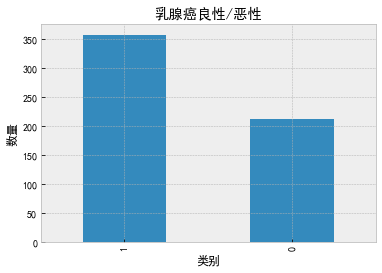

In [3]:
# 样本标签的状态
count_classes = pd.value_counts(data['target'],sort=True)
count_classes.plot(kind='bar')
plt.title('乳腺癌良性/恶性')
plt.xlabel('类别')
plt.ylabel('数量')

数据样本中大多数为正常样本，异常数据比较少
## 样本不均衡的解决方案
### 下采样
既然异常值少，让正常样本和一场样本一样少，正常样本（1）为350多条，异常样本（0）为200多条，从正常样本中去除200多条，和异常样本一样，这样就达到了均衡的目的。
### 过采样
不想放弃一条数据有价值数据，利用异常数据的特征，生成一部分异常数据，毕竟不是原始存在的。

In [4]:
# 下采样策略
X = data.iloc[:,data.columns!='target']
y = data.iloc[:,data.columns=='target']

# 获取异常值（0）的索引及数量
number_records_fraud = len(data[data['target']==0])
fraud_indices = np.array(data[data['target']==0].index)

# 获取所有正常样本的索引
normal_indices = data[data['target']==1].index

# 随机抽取正常样本值
random_normal_indices = np.random.choice(normal_indices,number_records_fraud,replace=False)

# 索引拼接
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# 利用索引值获取下采样样本值
under_sample_data = data.loc[under_sample_indices]

# 再根据下采样的样本数据获取X特征值与y的标签值
X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'target']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'target']

In [5]:
# 数据集分割
from sklearn.model_selection import train_test_split
# 对原始数据集进行分割（主要目的来对比采样策略）
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print('原始数据样本训练集个数',len(X_train))
print('原始数据样本测试集个数',len(X_test))
print('总数据样本量',len(X_train)+len(X_test))

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

# 对下采样数据进行分割
X_train_undersample,X_test_undersample,y_train_undersample,y_test_undersample = train_test_split(
    X_undersample,y_undersample,
    test_size=0.3,
    random_state=0)
print('下采样数据样本训练集个数',len(X_train_undersample))
print('下采样数据样本测试集个数',len(X_test_undersample))
print('总数据样本量',len(X_train_undersample)+len(X_test_undersample))

原始数据样本训练集个数 398
原始数据样本测试集个数 171
总数据样本量 569
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
下采样数据样本训练集个数 296
下采样数据样本测试集个数 128
总数据样本量 424


### 交叉验证
得到数据后，会将数据集分割成训练集和测试集，主要目的用来调参，训练完成后需要验证模型
常用的数据分割比例：<br>
7：3<br>
8：2<br>
9：1<br>


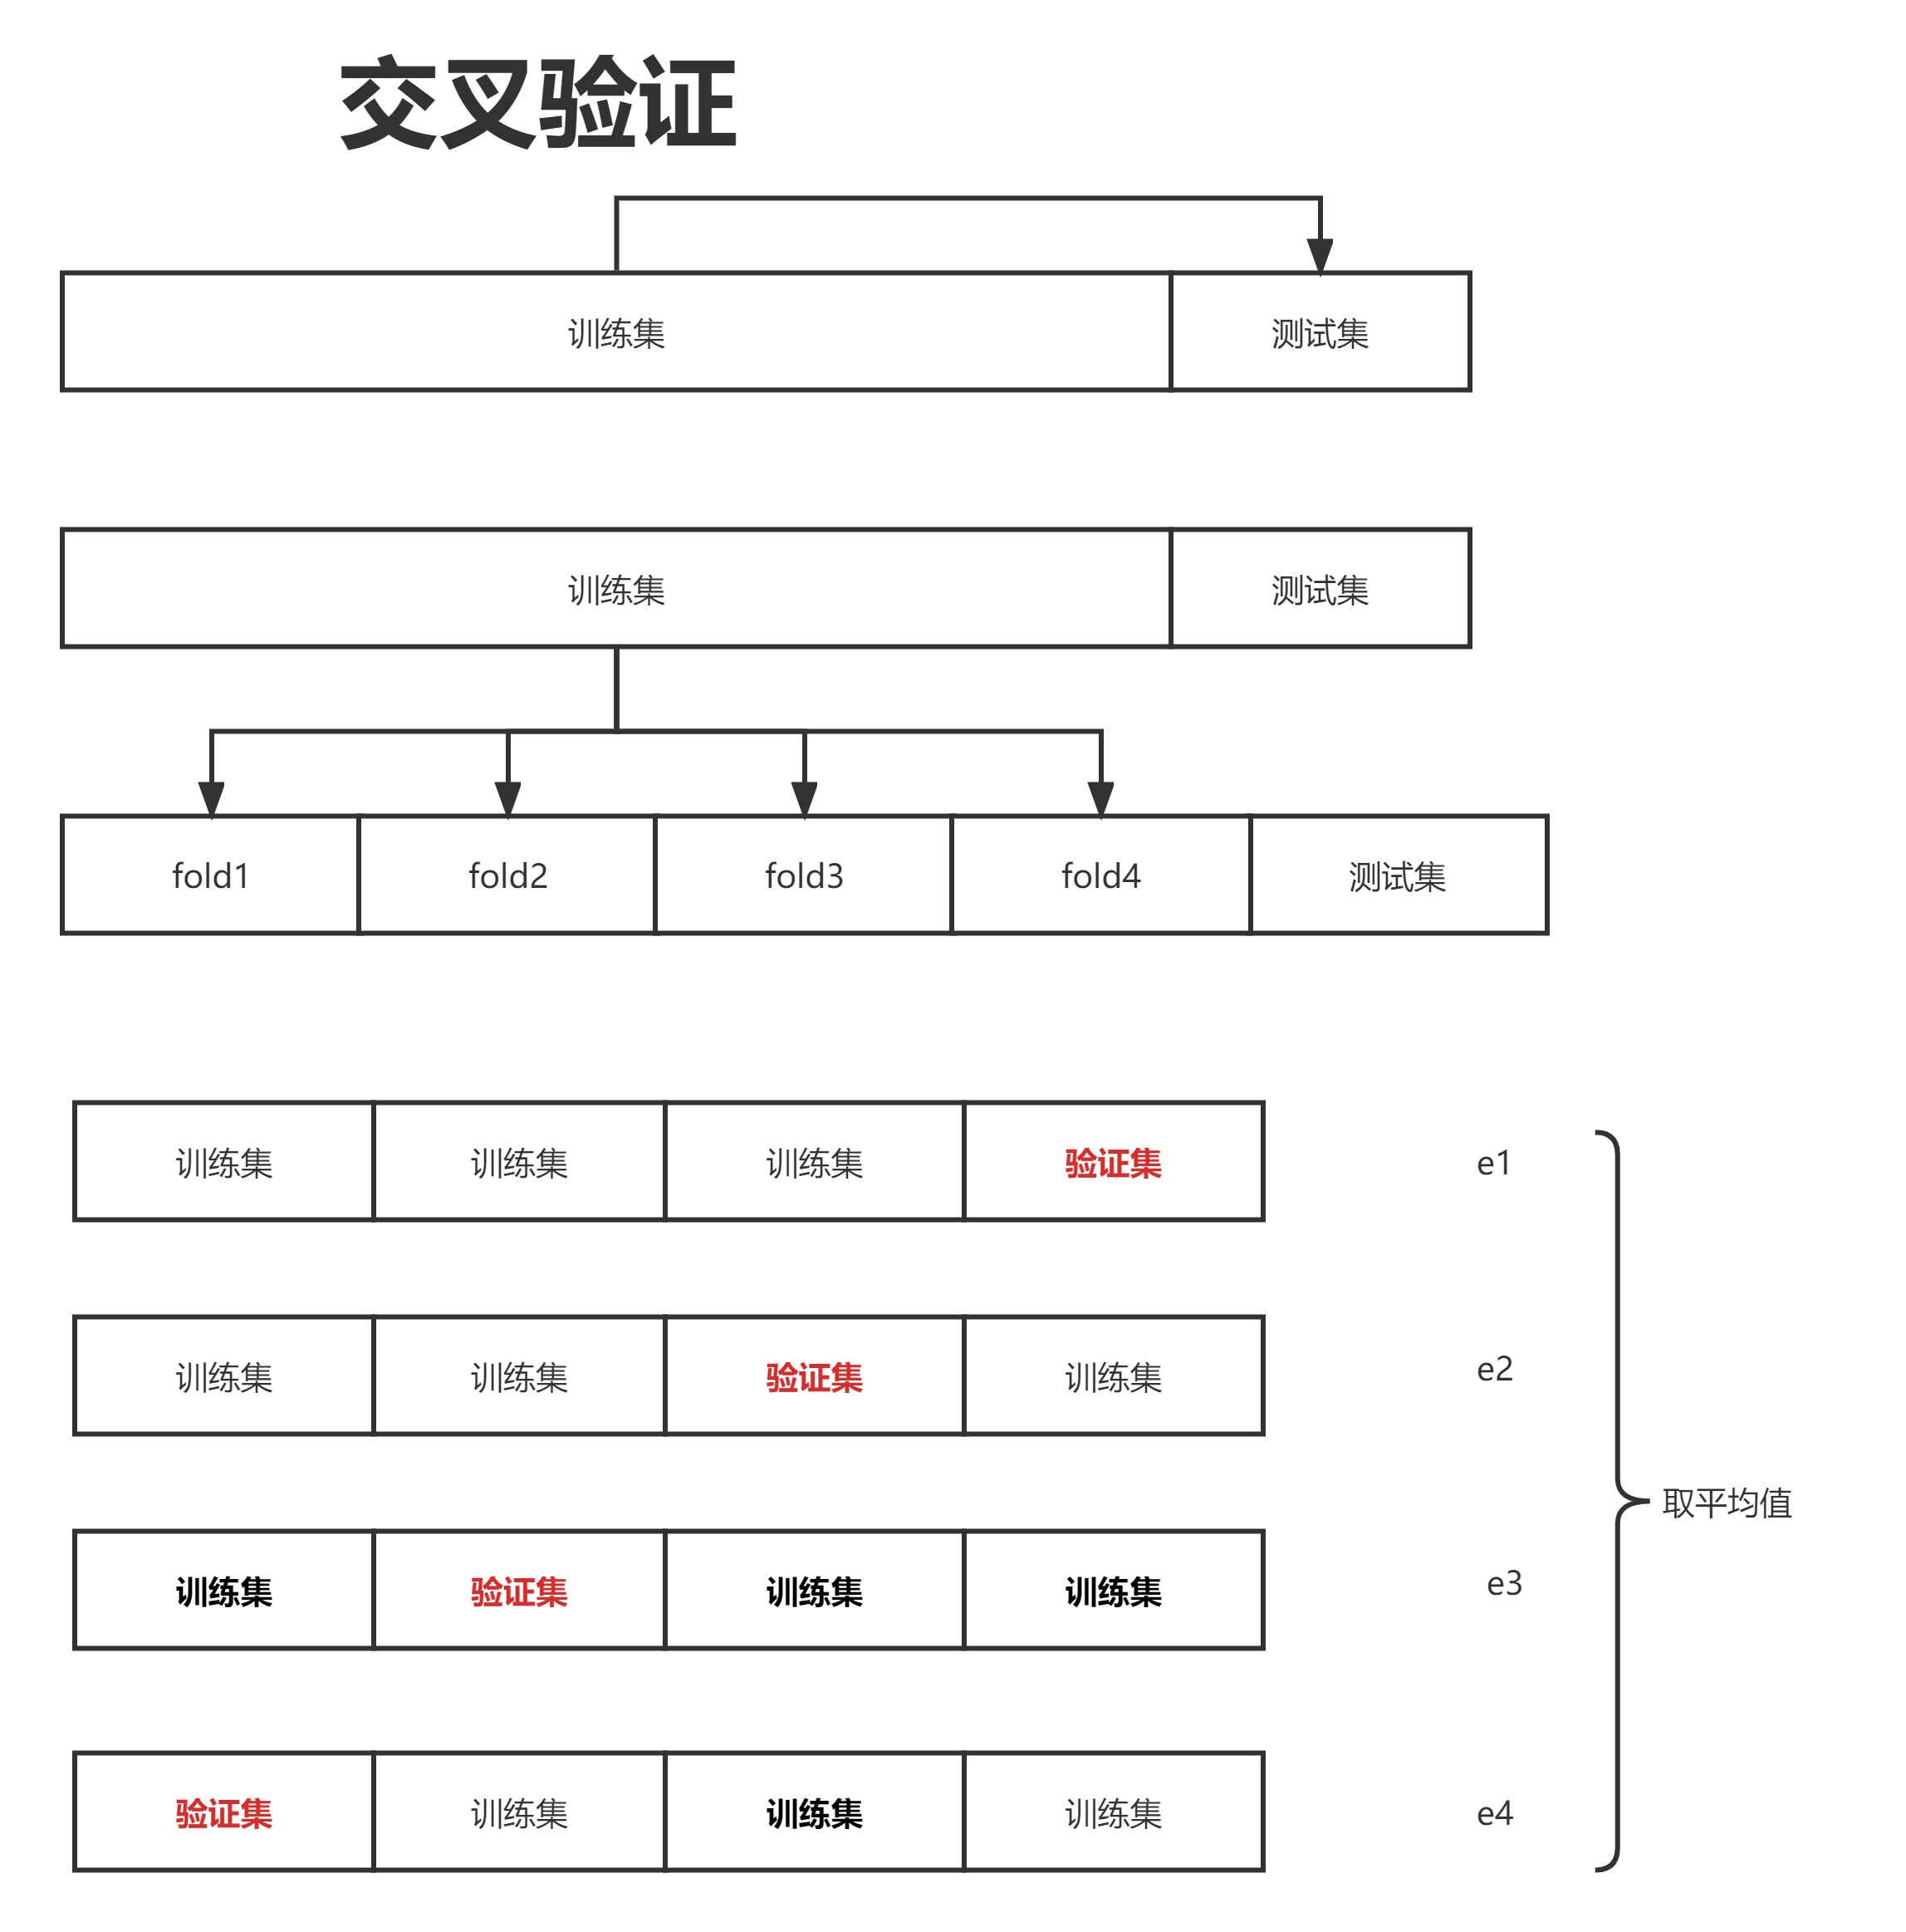

### 模型评估
准确率是分类问题中最常使用的一个参数，用于说明再整体中做对了多少。
#### 举例说明
医院一共有1000个患者，990个良性10个恶性，算法全部识别为良性了，只有10个识别错了，
“准确率 = 正确/总数”，990/1000=0.99，但是我们却一个恶性的患者都没有找到，准确率
很高但不够全面展示模型的好坏程度，针对不同的问题我们应该使用不同的评估指标来衡量模型
的好坏，召回率（Recall）：一个恶性的患者都没有找到意味着召回率为0。
#### 利用混淆矩阵来解释评估指标
某个班级有男生80人，女生20人，共计100人。目标是找出所有女生，再某次实验中挑选出50人，
其中20人为女生，另外错误的把30个男生当作女生了（女生为正类吗，男生为父类）
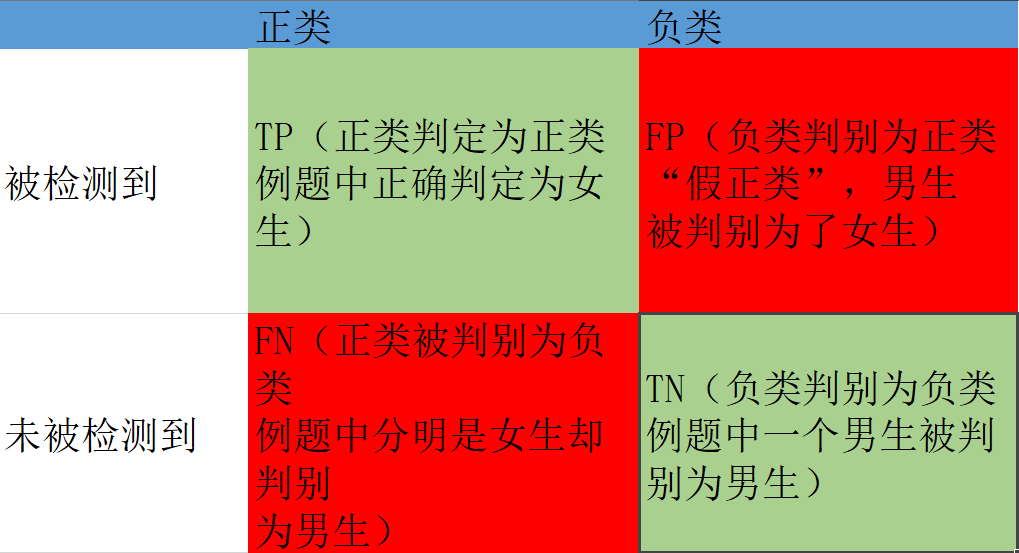
TP.预测结果正确，正类被预测成正类。<br>
FP。表明模型预测错误。把父类预测成正类，称为假正类。<br>
FN。把正类预测成负类。<br>
TN。预测结果正确，将负类预测成负类。<br>
#### 评估指标
1. 准确率（Accuracy）:表示在分类问题中，做对的占总的百分比。
    Accuracy = TP+TN/TP+TN+FP+FN
2. 召回率（Recall）: 表示在正类中有多少能预测到
    Recall = TP/TP+FN
3. 精确度（precision）：表示被分为正类中实际的正类比例。
    P= TP/TP+FP

#### 正则惩罚项
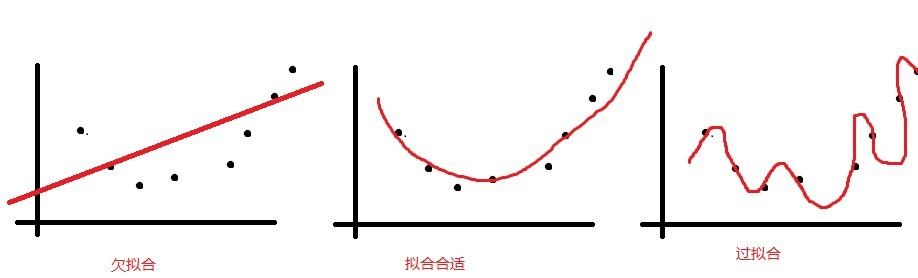
L1 正则化与 L2正则化

In [6]:
from sklearn.linear_model import LogisticRegression  # 逻辑回归
from sklearn.model_selection import StratifiedKFold,cross_val_score # 训练方法k-折
from sklearn.metrics import confusion_matrix,recall_score,classification_report # 评估指标
from sklearn.model_selection import cross_val_predict # 预测

In [7]:
# 交叉验证训练方法，用于调节正则惩罚项参数
def printing_Kfold_sores(x_trian_data,y_trian_data):
    # 分5折进行交叉验证
    fold = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
    # 声明不同的正则化惩罚项
    c_pram_range = [0.01,0.1,1,10,100]
    # 展示评估指标的表格
    result_table = pd.DataFrame(index=range(len(c_pram_range),2),columns=['c','mean_recall'])
    result_table['c'] = c_pram_range  
    j=0 
    # 将参数遍历
    for c_parm in c_pram_range:
        print('~~~~~~~~~~~~~~~~')
        print('当前惩罚力度为：',c_parm)
        print('~~~~~~~~~~~~~~~~')
        recall_accs = []
        # k折交叉验证
        for interation,indices in fold.split(x_trian_data,y_trian_data):
            # interation --> k-fold -->  train_data
            # indices --> k-fold -->  test_data
            # 指定算法模型
            lr = LogisticRegression(C=c_parm,penalty='l1',solver='liblinear')
            # 训练模型
            x_train_fold = x_trian_data.iloc[interation]
            y_trian_fold = y_trian_data.iloc[interation]
            x_test_fold = x_trian_data.iloc[indices]
            y_test_fold = y_trian_data.iloc[indices]
            lr.fit(x_train_fold,y_trian_fold)    
            # 预测结果
            y_pred_undersample = lr.predict(x_test_fold)   
            # 计算召回率
            recall_ass = recall_score(y_test_fold,y_pred_undersample)
            # 保存召回率
            recall_accs.append(recall_ass)
            
        # 执行完毕所有的交叉验证后，计算平均召回率
        result_table.loc[j,'mean_recall'] = np.mean(recall_accs)
        j += 1
        print()
        print('平均召回率',np.mean(recall_accs))
        print()
    # 拿到最好的参数
    best_c = result_table.loc[result_table['mean_recall'].astype('float32').idxmax()]['c']
    print(best_c)
    return best_c    

In [8]:
best_c = printing_Kfold_sores(X_train_undersample,y_train_undersample)

~~~~~~~~~~~~~~~~
当前惩罚力度为： 0.01
~~~~~~~~~~~~~~~~

平均召回率 0.9546236559139786

~~~~~~~~~~~~~~~~
当前惩罚力度为： 0.1
~~~~~~~~~~~~~~~~

平均召回率 0.9286021505376343

~~~~~~~~~~~~~~~~
当前惩罚力度为： 1
~~~~~~~~~~~~~~~~

平均召回率 0.9546236559139786

~~~~~~~~~~~~~~~~
当前惩罚力度为： 10
~~~~~~~~~~~~~~~~

平均召回率 0.9606451612903225

~~~~~~~~~~~~~~~~
当前惩罚力度为： 100
~~~~~~~~~~~~~~~~

平均召回率 0.9544086021505377

10.0


In [9]:
print(best_c)

10.0


In [30]:
import itertools
# 绘制混淆矩阵图
def plot_confusion_matrix(cm,classes,title='混淆矩阵'):
    plt.imshow(cm,cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    plt.grid('False')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes)
    plt.yticks(tick_marks,classes)
    thresh = cm.max() / 2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(i,j,cm[i,j],horizontalalignment='center',
                color='white' if cm[i,j] > thresh else 'black',size=15)

召回率： 1.0


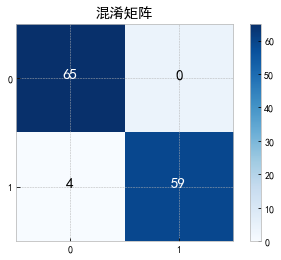

In [11]:
# 最终确认最好的参数，然后利用下采样进行训练
lr = LogisticRegression(C=best_c,penalty='l1',solver='liblinear')
lr.fit(X_train_undersample,y_train_undersample)
# 进行验证
y_pred_undersample = lr.predict(X_test_undersample)
# 获取混淆矩阵的数据
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
# 获取召回率
recall_acc = recall_score(y_test_undersample,y_pred_undersample)
class_name = [0,1]
# 出图
plot_confusion_matrix(cnf_matrix,class_name)
print('召回率：',recall_acc)

召回率： 0.9537037037037037


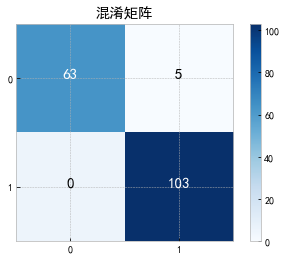

In [20]:
# 最终确认最好的参数，然后利用原数据进行训练
lr = LogisticRegression(C=best_c,penalty='l1',solver='liblinear')
lr.fit(X_train,y_train)
# 进行验证
y_pred = lr.predict(X_test)
# 获取混淆矩阵的数据
cnf_matrix = confusion_matrix(y_test,y_pred)
# 获取召回率
recall_acc = recall_score(y_test,y_pred)
class_name = [0,1]
# 出图
plot_confusion_matrix(cnf_matrix,class_name)

print('召回率：',recall_acc)

###  分类阈值对结果的影响
逻辑回归算法的原理，通过sigmoid函数将得分值转换成概率值。正负类的结果是以0.5为界限划分。
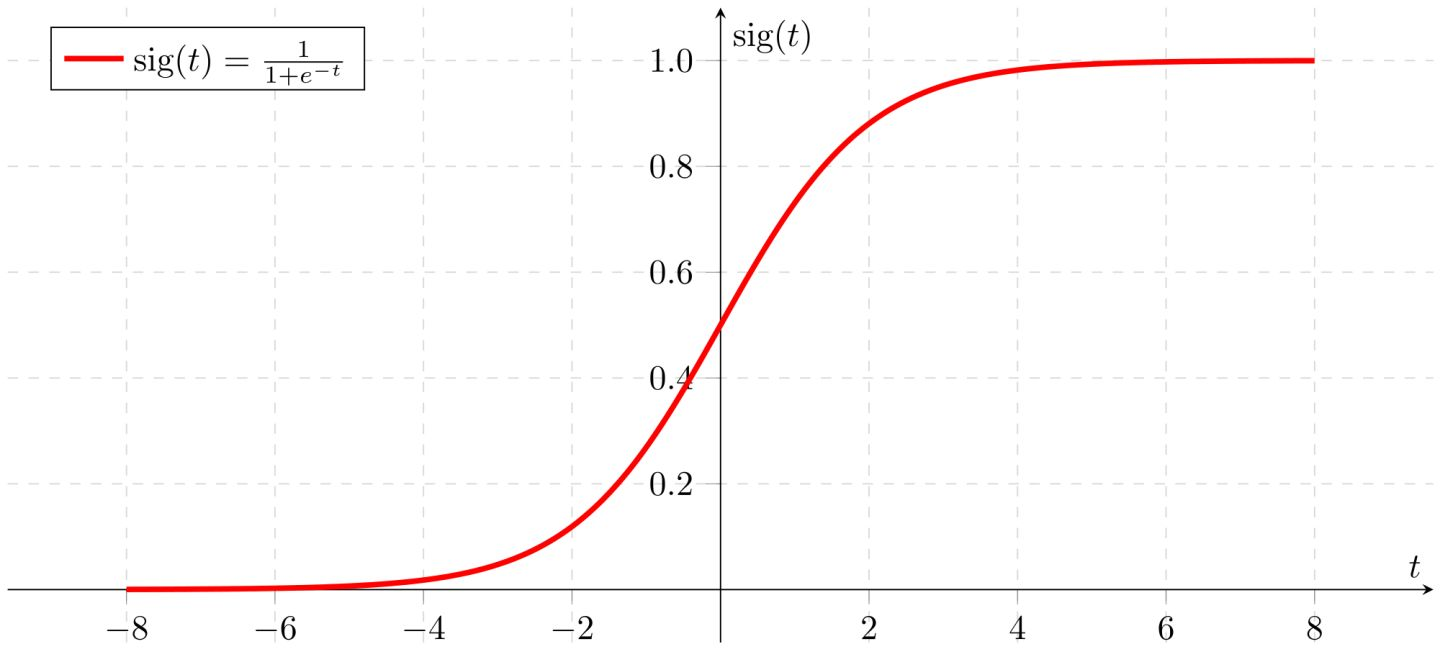
正类（良性） p > 0.5 <br>
负类（恶性） p < 0.5

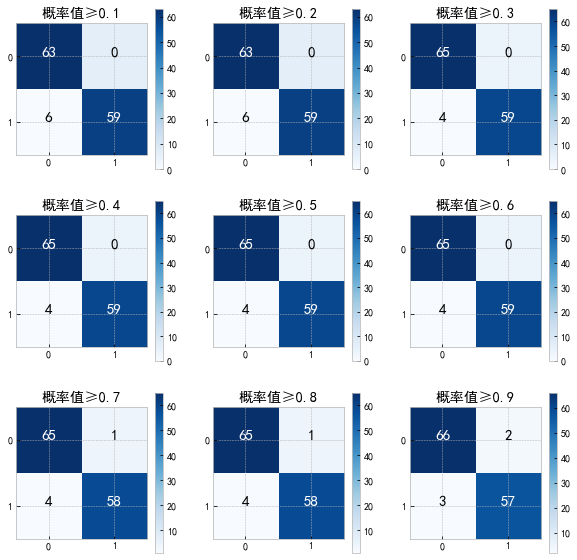

In [31]:
# 逻辑回归算法确定最佳阈值
lr = LogisticRegression(C=best_c,solver='liblinear',penalty='l1')
lr.fit(X_train_undersample,y_train_undersample)
# 得出概率结果而不是分类结果
y_pred_undersample_proba = lr.predict_proba(X_test_undersample)

# 指定不同的阈值
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 绘制多子图来展示分类结果的混淆矩阵图
plt.figure(figsize=(10,10))
j = 1 
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    plt.subplot(3,3,j)
    j += 1
    conf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    class_name = [0,1]
    plot_confusion_matrix(conf_matrix,class_name,title='概率值≥{}'.format(i))

# y_pred_undersample_proba

### 过采样方案
通过上述实验中，下采样方案，还有待商榷。
#### SMOTE 数据生成策略（特征工程中：数据增强）
原数据：300多的正常值（良性），200多的异常值（恶性），多少数样本数据进行增强（生成），不是简单的粘贴复制，同样的数据是无意义的。
#### SMOTE算法步骤
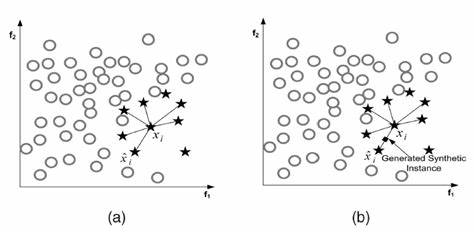

In [37]:
from imblearn.over_sampling import SMOTE

In [49]:
# 基于SMOTE 算法生成数据样本
oversample = SMOTE(random_state=0)
X_train_os,y_train_os = oversample.fit_resample(X_train,y_train)

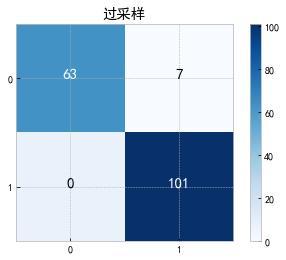

In [50]:
lr = LogisticRegression(C=best_c,solver='liblinear',penalty='l1')
lr.fit(X_train_os,y_train_os)
y_pred = lr.predict(X_test)

cnf_matrix = confusion_matrix(y_test,y_pred)

class_name = [0,1]
plot_confusion_matrix(cnf_matrix,class_name,title='过采样')

In [51]:
import joblib

In [52]:
# 模型保存
joblib.dump(lr,'lr_g.pkl')

['lr_g.pkl']

In [63]:
# 利用保存好的模型进行新数据的预测
lr = joblib.load('lr_g.pkl')
new_data_0 = [17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189]
new_data_1 = [13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023,15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259]
new_data_array = np.array(new_data_0).reshape(1, -1)
res = lr.predict(new_data_array)
if res[0] == 0:
    print('预测的结果为：乳腺癌恶性')
else:
    print('预测的结果为：乳腺癌良性')
# new_data_array

预测的结果为：乳腺癌恶性
